In [216]:
import pandas as pd
from statistics import mean, stdev
import scipy
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob
import numpy as np

In [217]:
plt.rcParams["figure.figsize"] = (8,7)

# Functions 

In [218]:
def create_label(row):
    if row['Diff'] > 0.35: return "> 0.35"
    if row['Diff'] > 0.30: return "> 0.30"
    if row['Diff'] > 0.25: return "> 0.25"
    if row['Diff'] > 0.20: return "> 0.20"
    if row['Diff'] > 0.15: return "> 0.15"
    if row['Diff'] > 0.10: return "> 0.10"
    if row['Diff'] > 0.05: return "> 0.05"
    if row['Diff'] < 0.05: return "< 0.05"
    

# Architecture State Of Art 
- trained on personal computer

In [219]:
Lenet5_cifar = {'file_name' : 'Lenet5',
                  'training_time(s)' : 3234.000,
                  'test_result_loss' : 0.8703,
                  'test_result_acc' : 0.7813,
                  'train_result_acc' : 0.9308,
                  'train_result_loss' : 0.1998,
                  'nb_layers' : 11,
                  'epochs': 50,
                  'type_archi' :'LENET5'}

resnet18_cifar = {'file_name' : 'Resnet18',
                  'training_time(s)' : 3123,
                  'test_result_loss' : 0.9940,
                  'test_result_acc' : 0.6689,
                  'train_result_acc' : 0.7516,
                  'train_result_loss' : 0.7161,
                  'nb_layers' : 72,
                  'epochs': 5,
                  'type_archi': 'RESNET18'}

DenseNet_base_cifar = {'file_name' : 'DenseNet_Base',
                  'training_time(s)' : 23451.000,
                  'test_result_loss' : 0.7563,
                  'test_result_acc' : 0.7442,
                  'train_result_acc' : 0.7066,
                  'train_result_loss' : 1.2783,
                  'nb_layers' : 92,
                  'epochs': 50,
                  'type_archi': 'DENSENET_BASE'}

DenseNet121_cifar = {'file_name' : 'DenseNet121',
                  'training_time(s)' : 8261.000,
                  'test_result_loss' : 0.7479,
                  'test_result_acc' : 0.7355,
                  'train_result_acc' : 0.6100,
                  'train_result_loss' : 1.1291,
                  'nb_layers' : 430,
                  'epochs': 5,
                  'type_archi': 'DENSENET121'}

In [220]:
data_soa = pd.DataFrame([Lenet5_cifar, resnet18_cifar, DenseNet_base_cifar,DenseNet121_cifar], 
                        index = [0,1,2,3], 
                        columns=['file_name', 
                                 'training_time(s)', 
                                 'test_result_loss', 
                                 'test_result_acc',
                                 'train_result_acc',
                                 'train_result_loss',
                                 'nb_layers',
                                 'epochs',
                                 'type_archi']
                       )

In [221]:
data_soa

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
0,Lenet5,3234.0,0.8703,0.7813,0.9308,0.1998,11,50,LENET5
1,Resnet18,3123.0,0.9940,0.6689,0.7516,0.7161,72,5,RESNET18
2,DenseNet_Base,23451.0,0.7563,0.7442,0.7066,1.2783,92,50,DENSENET_BASE
3,DenseNet121,8261.0,0.7479,0.7355,0.6100,1.1291,430,5,DENSENET121


<function matplotlib.pyplot.show(close=None, block=None)>

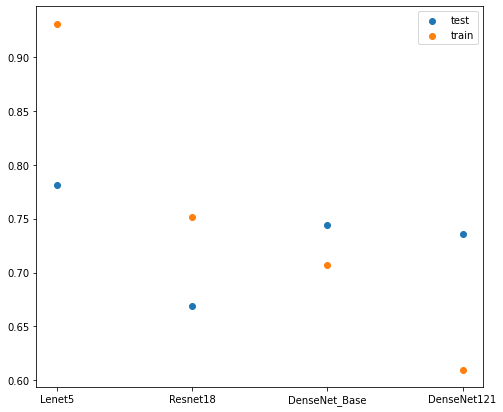

In [222]:
plt.scatter(data_soa['file_name'], data_soa['test_result_acc'], label="test")
plt.scatter(data_soa['file_name'], data_soa['train_result_acc'], label="train")

plt.legend()
plt.show

# Architecture Diversitas
- State of the art trained on diversitas Irisa Renne

In [223]:
Lenet5_cifar_div = {'file_name' : 'Lenet5',
                  'training_time(s)' : 860,
                  'test_result_loss' : 0.7470,
                  'test_result_acc' : 0.7529,
                  'train_result_acc' : 0.8712,
                  'train_result_loss' : 0.4110,
                  'nb_layers' : 11,
                  'epochs': 37,
                  'type_archi' :'LENET5'}

resnet18_cifar_div = {'file_name' : 'Resnet18',
                  'training_time(s)' : 3912,
                  'test_result_loss' : 2.7862,
                  'test_result_acc' : 0.4143,
                  'train_result_acc' : 0.8973,
                  'train_result_loss' : 0.3026 ,
                  'nb_layers' : 72,
                  'epochs': 12,
                  'type_archi': 'RESNET18'}

DenseNet_base_cifar_div = {'file_name' : 'DenseNet_Base',
                  'training_time(s)' : 23451,
                  'test_result_loss' : 2.0946,
                  'test_result_acc' : 0.4428,
                  'train_result_acc' : 0.4484,
                  'train_result_loss' : 2.0254,
                  'nb_layers' : 92,
                  'epochs': 50,
                  'type_archi': 'DENSENET_BASE'}

DenseNet121_cifar_div = {'file_name' : 'DenseNet121',
                  'training_time(s)' : 17296,
                  'test_result_loss' : 3.1953,
                  'test_result_acc' : 0.2490,
                  'train_result_acc' : 0.9564,
                  'train_result_loss' : 0.1495,
                  'nb_layers' : 430,
                  'epochs': 11,
                  'type_archi': 'DENSENET121'}

In [224]:
data_soa_diversitas = pd.DataFrame([Lenet5_cifar_div, resnet18_cifar_div, DenseNet_base_cifar_div, DenseNet121_cifar_div], 
                        index = [0,1,2,3], 
                        columns=['file_name', 
                                 'training_time(s)', 
                                 'test_result_loss', 
                                 'test_result_acc',
                                 'train_result_acc',
                                 'train_result_loss',
                                 'nb_layers',
                                 'epochs',
                                 'type_archi']
                       )

In [225]:
data_soa_diversitas["Diff"] = data_soa_diversitas['train_result_acc']-data_soa_diversitas['test_result_acc']

In [226]:
data_soa_diversitas

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi,Diff
0,Lenet5,860,0.7470,0.7529,0.8712,0.4110,11,37,LENET5,0.1183
1,Resnet18,3912,2.7862,0.4143,0.8973,0.3026,72,12,RESNET18,0.4830
2,DenseNet_Base,23451,2.0946,0.4428,0.4484,2.0254,92,50,DENSENET_BASE,0.0056
3,DenseNet121,17296,3.1953,0.2490,0.9564,0.1495,430,11,DENSENET121,0.7074


<function matplotlib.pyplot.show(close=None, block=None)>

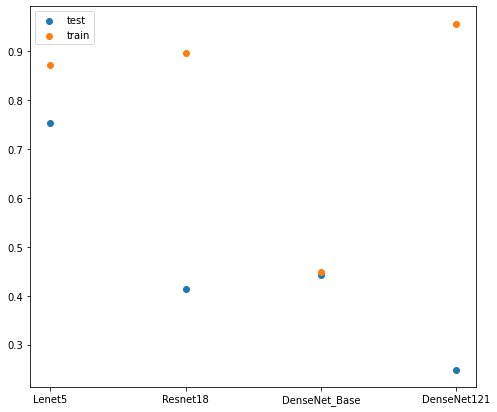

In [227]:
plt.scatter(data_soa_diversitas['file_name'], data_soa_diversitas['test_result_acc'], label="test")
plt.scatter(data_soa_diversitas['file_name'], data_soa_diversitas['train_result_acc'], label="train")

plt.legend()
plt.show

# Architecture diversitas 64
- State of the art trained on diversitas Irisa Renne

In [228]:
Lenet5_M_cifar_64 = {
                  'file_name': 'LENET5_M', 
                  'training_time(s)' : 158,
                  'test_result_loss' : None, 
                  'test_result_acc' : 0.77,
                  'train_result_acc' : 0.92,
                  'train_result_loss': None,
                  'nb_layers' : 11,
                  'epochs': 29,
                  'type_archi' :'LENET5_M'}

Lenet5_O_cifar_64 = {
                  'file_name': 'LENET5_O',
                  'training_time(s)' : 111,
                  'test_result_loss' : None, 
                  'test_result_acc' : 0.66,
                  'train_result_acc' : 0.87,
                  'train_result_loss': None,
                  'nb_layers' : 9,
                  'epochs': 26,
                  'type_archi' :'LENET5_O'}

resnet18_cifar_64 = {
                  'file_name': 'RESNET18',
                  'training_time(s)' : 376,
                  'test_result_loss' : None, 
                  'test_result_acc' : 0.70,
                  'train_result_acc' : 0.87,
                      'train_result_loss': None,
                  'nb_layers' : 72,
                  'epochs': 24,
                  'type_archi': 'RESNET18'}

DenseNet_base_cifar_64 = {'file_name' : 'DenseNet_Base',
                  'training_time(s)' : 1305,
                  'test_result_loss' : None,
                  'test_result_acc' : 0.67,
                  'train_result_acc' : 0.69,
                  'train_result_loss': None,
                  'nb_layers' : 92,
                  'epochs': 42,
                  'type_archi': 'DENSENET_BASE'}

DenseNet121_cifar_64 = {
                  'file_name': 'DENSENET121',
                  'training_time(s)' : 1013,
                  'test_result_loss' : None,
                  'test_result_acc' : 0.58,
                  'train_result_acc' : 0.81,
                      'train_result_loss': None,
                  'nb_layers' : 430,
                  'epochs': 20,
                  'type_archi': 'DENSENET121'}

In [229]:
data_soa_diversitas_64 = pd.DataFrame([Lenet5_M_cifar_64, Lenet5_O_cifar_64,resnet18_cifar_64, DenseNet_base_cifar_64,DenseNet121_cifar_64], 
                        index = [0,1,2,3,4], 
                        columns=['file_name', 
                                 'training_time(s)', 
                                 'test_result_loss', 
                                 'test_result_acc',
                                 'train_result_acc',
                                 'train_result_loss',
                                 'nb_layers',
                                 'epochs',
                                 'type_archi']
                       )

In [230]:
data_soa_diversitas_64["Diff"] = data_soa_diversitas_64['train_result_acc']-data_soa_diversitas_64['test_result_acc']

In [231]:
data_soa_diversitas_64['label_diff'] = data_soa_diversitas_64.apply(lambda row: create_label(row), axis = 1)

In [232]:
data_soa_diversitas_64

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi,Diff,label_diff
0,LENET5_M,158,None,0.77,0.92,None,11,29,LENET5_M,0.15,> 0.15
1,LENET5_O,111,None,0.66,0.87,None,9,26,LENET5_O,0.21,> 0.20
2,RESNET18,376,None,0.70,0.87,None,72,24,RESNET18,0.17,> 0.15
3,DenseNet_Base,1305,None,0.67,0.69,None,92,42,DENSENET_BASE,0.02,< 0.05
4,DENSENET121,1013,None,0.58,0.81,None,430,20,DENSENET121,0.23,> 0.20


<function matplotlib.pyplot.show(close=None, block=None)>

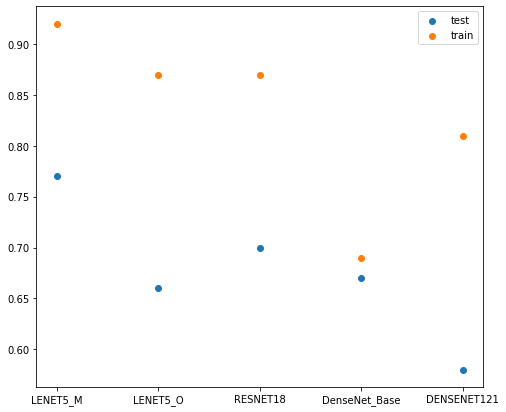

In [233]:
plt.scatter(data_soa_diversitas_64['file_name'], data_soa_diversitas_64['test_result_acc'], label="test")
plt.scatter(data_soa_diversitas_64['file_name'], data_soa_diversitas_64['train_result_acc'], label="train")

plt.legend()
plt.show

# Architecture Data

In [234]:
data = pd.read_csv('architecture_results_v3.csv')

In [235]:
data

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
0,archi_v3_1,137.961022,0.172679,0.9430,0.946383,0.158794,32,5,RESNET
1,archi_v3_2,34.092646,1.177252,0.5959,0.593417,1.198786,5,5,DENSENET
2,archi_v3_3,70.545813,0.560783,0.7953,0.786633,0.594876,25,5,ALL
3,archi_v3_4,32.900410,1.212360,0.5561,0.556550,1.236942,7,5,LENET
4,archi_v3_5,156.514521,3.457778,0.3775,0.374550,3.523504,56,5,ALL
...,...,...,...,...,...,...,...,...,...
425,archi_v3_196,768.147602,1.956192,0.6504,0.758840,1.069472,79,43,DENSENET
426,archi_v3_197,290.178942,1.202554,0.5774,0.603700,1.122089,52,26,DENSENET
427,archi_v3_198,250.124930,2.343708,0.6046,0.804780,0.934348,31,32,DENSENET
428,archi_v3_199,129.796905,1.647543,0.3984,0.407940,1.633172,5,42,DENSENET


# Experiment 1 : State Machine v3

In [236]:
test1 = data[:10]

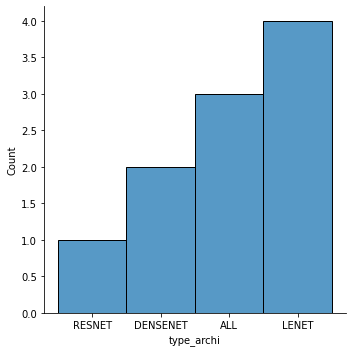

In [237]:
sns.displot(test1, x="type_archi")

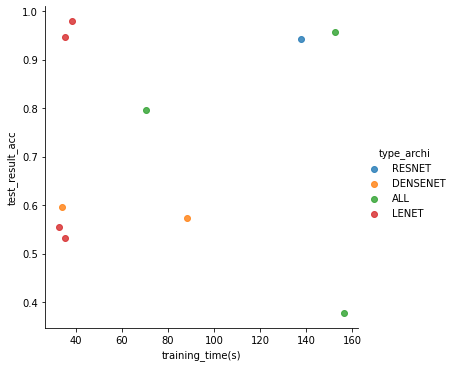

In [238]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test1,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

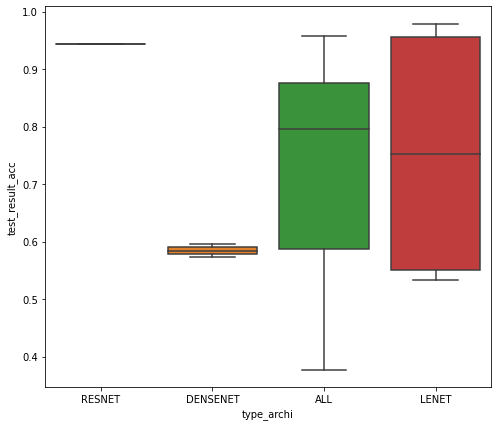

In [239]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test1)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

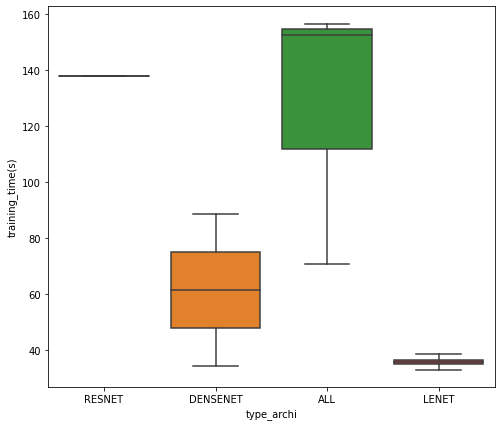

In [240]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test1)

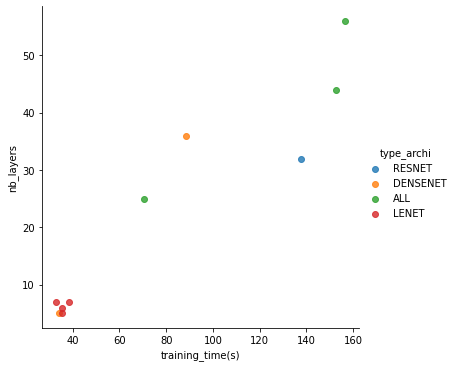

In [241]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test1,
    fit_reg=False,
    hue='type_archi'
)

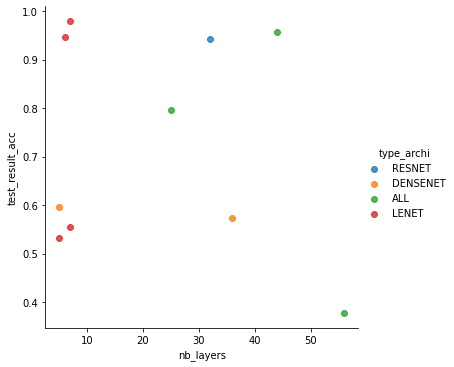

In [242]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test1,
    fit_reg=False,
    hue='type_archi'
)

# Experiment 2 : Block

In [243]:
test2 = data[10:40]

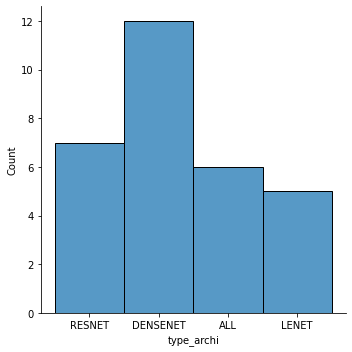

In [244]:
sns.displot(test2, x="type_archi")

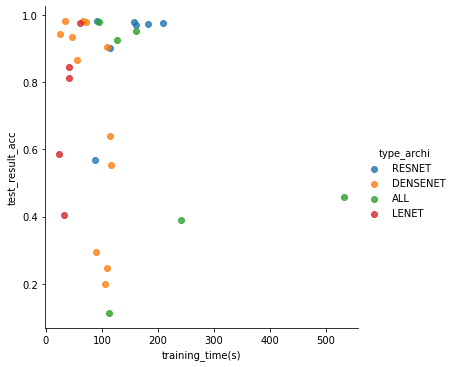

In [245]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test2,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

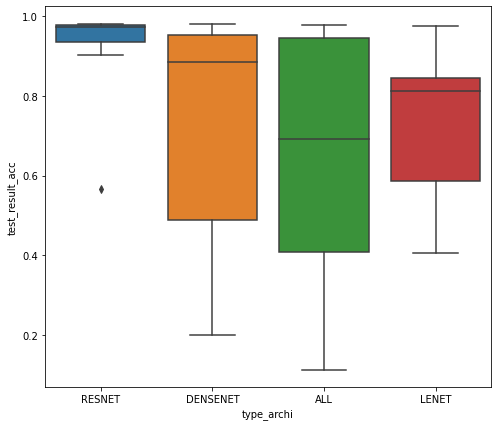

In [246]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test2)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

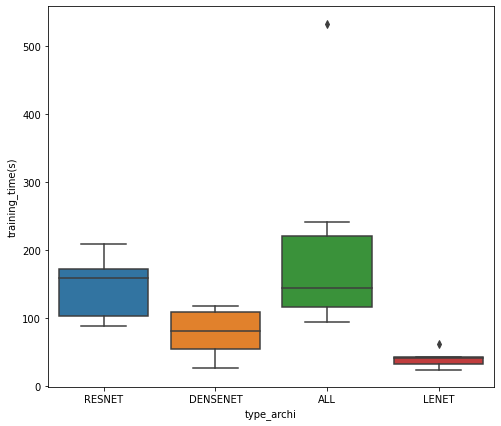

In [247]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test2)

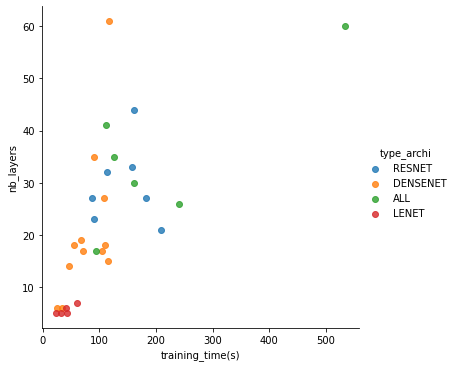

In [248]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test2,
    fit_reg=False,
    hue='type_archi'
)

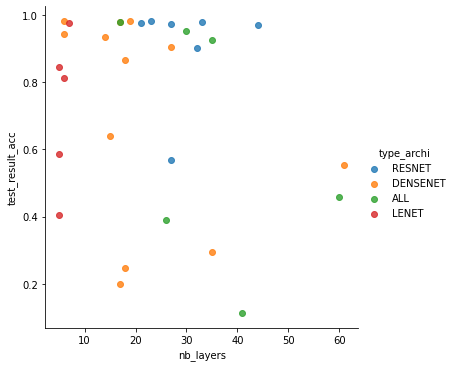

In [249]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test2,
    fit_reg=False,
    hue='type_archi'
)

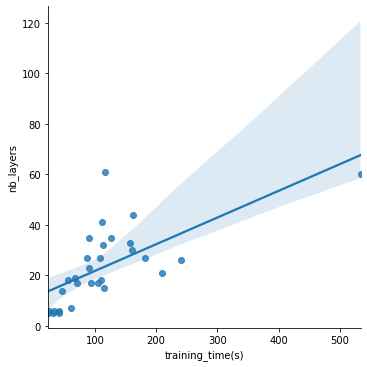

In [250]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test2,
    fit_reg=True
)

# Experiment 3 : Cifar

In [251]:
test3 = data[40:70]

In [252]:
test3

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
40,archi_v3_1,114.101931,1.460473,0.4703,0.48020,1.441289,32,5,RESNET
41,archi_v3_2,46.496251,1.803117,0.3246,0.32260,1.803775,18,5,DENSENET
42,archi_v3_3,80.009860,1.296909,0.5268,0.55216,1.225355,23,5,RESNET
43,archi_v3_4,188.287363,1.444496,0.4808,0.49434,1.414573,30,5,ALL
44,archi_v3_5,299.288743,1.937277,0.2170,0.21784,1.934680,26,5,ALL
45,archi_v3_6,89.250098,2.255981,0.1158,0.11548,2.257101,19,5,DENSENET
46,archi_v3_7,208.247876,1.265950,0.5530,0.58008,1.178796,31,5,RESNET
47,archi_v3_8,150.352577,2.031523,0.1887,0.18898,2.035775,41,5,ALL
48,archi_v3_9,67.913760,1.456546,0.4797,0.50096,1.407333,7,5,LENET
49,archi_v3_10,47.467861,1.685498,0.3767,0.37402,1.687152,6,5,LENET


<function matplotlib.pyplot.show(close=None, block=None)>

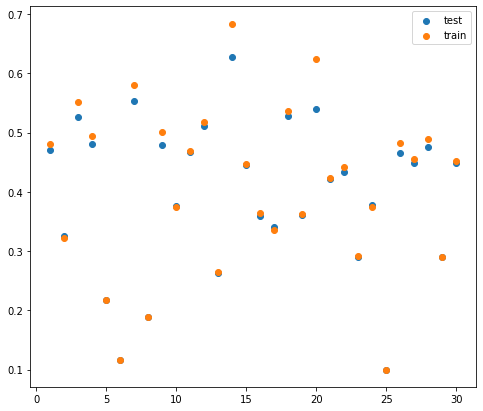

In [253]:
plt.scatter(range(1,31), test3['test_result_acc'], label="test")
plt.scatter(range(1,31), test3['train_result_acc'], label="train")

plt.legend()
plt.show

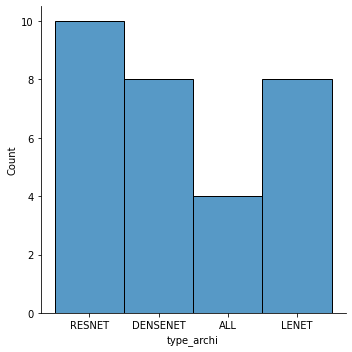

In [254]:
sns.displot(test3, x="type_archi")

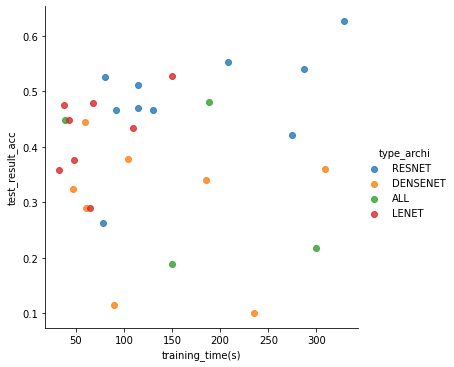

In [255]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test3,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

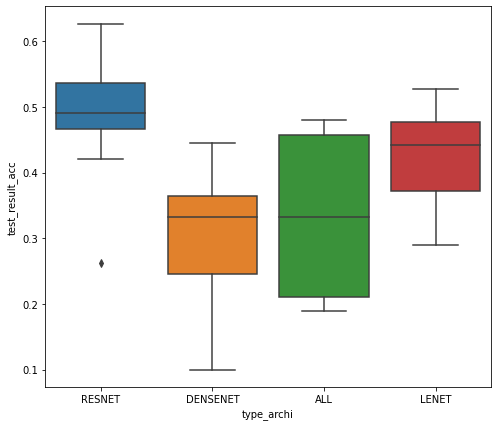

In [256]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test3)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

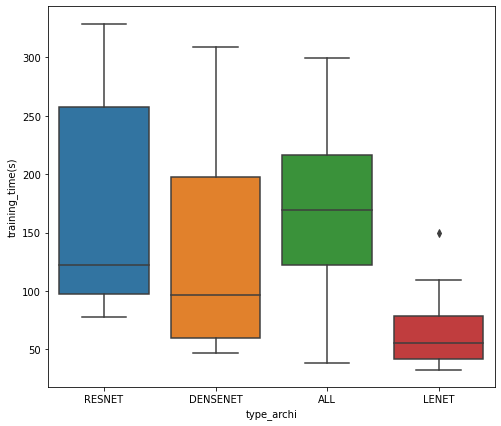

In [257]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test3)

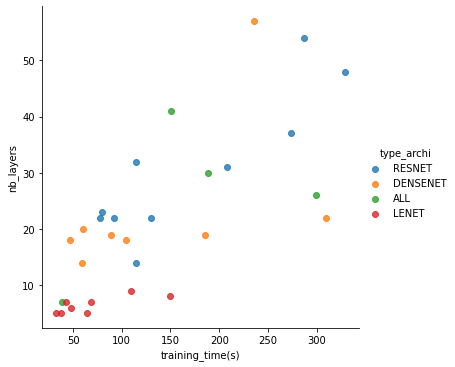

In [258]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test3,
    fit_reg=False,
    hue='type_archi'
)

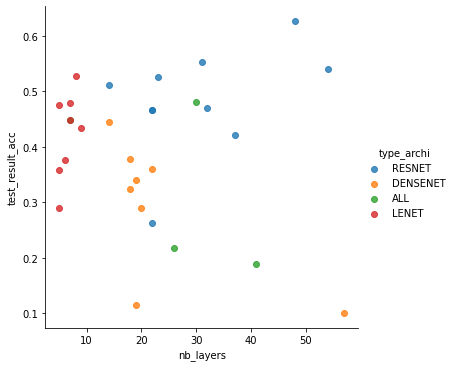

In [259]:
sns.lmplot(
    x='nb_layers',
    y='test_result_acc',
    data=test3,
    fit_reg=False,
    hue='type_archi'
)

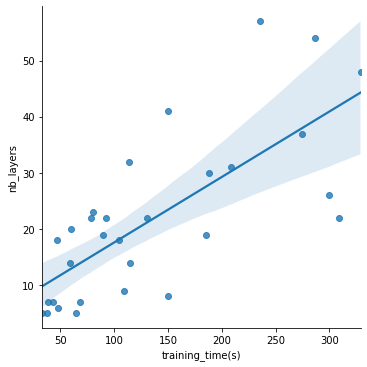

In [260]:
sns.lmplot(
    x='training_time(s)',
    y='nb_layers',
    data=test3,
    fit_reg=True
)

# Experiment 4 : Epochs
- more epochs (max 50)
- earlystopping

In [261]:
test4 = data[70:100]

In [262]:
test4

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
70,archi_v3_1,798.351023,1.289643,0.5326,0.57008,1.183775,32,34,RESNET
71,archi_v3_2,171.644020,1.749008,0.3465,0.34034,1.746196,18,14,DENSENET
72,archi_v3_3,627.813203,1.313787,0.5549,0.68076,0.902783,23,39,RESNET
73,archi_v3_4,749.831077,1.236278,0.5595,0.62448,1.058717,30,30,ALL
74,archi_v3_5,191.680154,1.929973,0.2138,0.21534,1.932666,26,10,ALL
75,archi_v3_6,177.881168,2.213312,0.1292,0.12836,2.210249,19,19,DENSENET
76,archi_v3_7,818.211906,1.340803,0.5474,0.69816,0.853304,31,50,RESNET
77,archi_v3_8,283.723264,1.933496,0.2081,0.20686,1.936604,41,18,ALL
78,archi_v3_9,276.185378,1.512171,0.4939,0.63846,1.028738,7,45,LENET
79,archi_v3_10,109.447790,1.628932,0.4086,0.40380,1.619255,6,20,LENET


<function matplotlib.pyplot.show(close=None, block=None)>

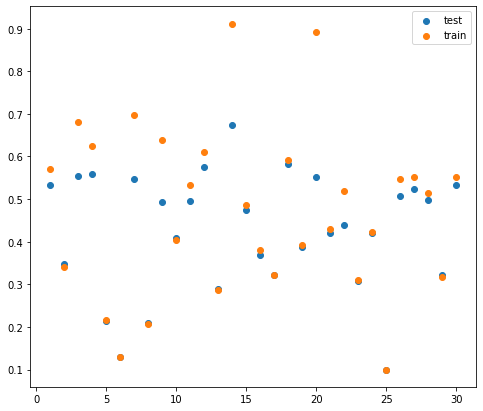

In [263]:
plt.scatter(range(1,31), test4['test_result_acc'], label="test")
plt.scatter(range(1,31), test4['train_result_acc'], label="train")

plt.legend()
plt.show

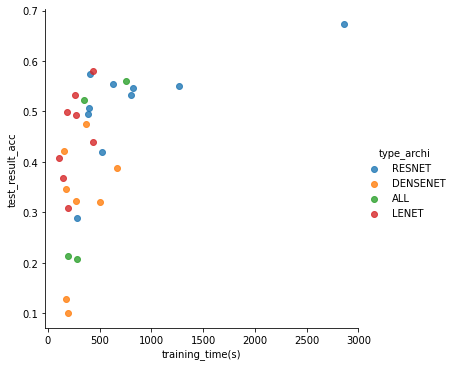

In [264]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test4,
    hue='type_archi',
    fit_reg=False
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

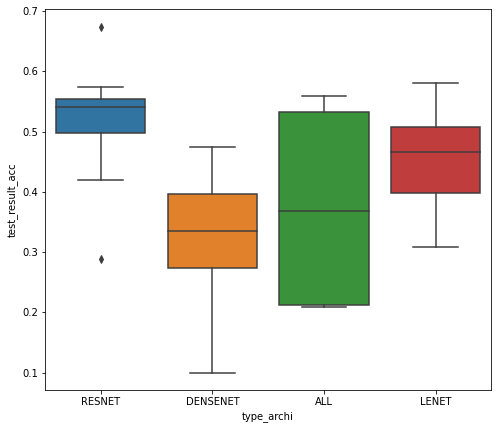

In [265]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test4)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

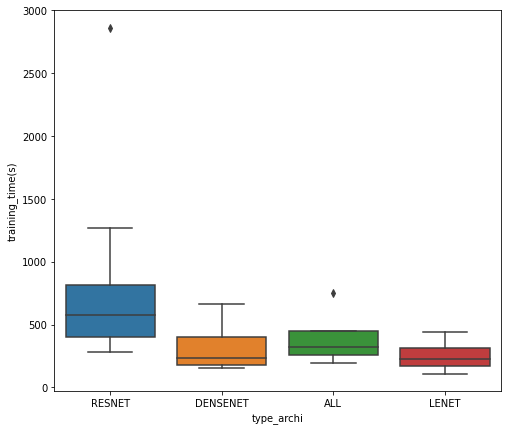

In [266]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test4)

<AxesSubplot:xlabel='type_archi', ylabel='epochs'>

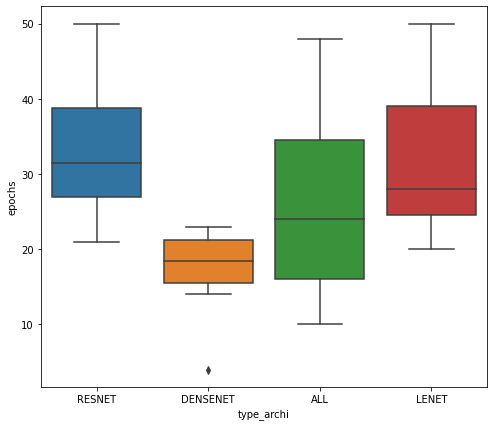

In [267]:
sns.boxplot(y='epochs', x='type_archi', data=test4)

# Experiment 5 : Densenet
- modification DenseNet :
    - add num denseBlock
    - modification num of layer in denseBlock

In [268]:
test5 = data[100:130]

In [269]:
test5

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi
100,archi_v3_1,1525.798082,1.350952,0.5952,0.81200,0.550849,34,39,RESNET
101,archi_v3_2,713.016974,1.371146,0.4994,0.50890,1.359286,20,43,DENSENET
102,archi_v3_3,1118.127618,2.363658,0.6085,0.92128,0.342187,23,34,RESNET
103,archi_v3_4,5339.603906,2.150796,0.6389,0.94306,0.274311,82,37,ALL
104,archi_v3_5,660.574110,1.235836,0.5544,0.58442,1.164664,6,45,LENET
105,archi_v3_6,292.312238,1.607489,0.4513,0.56824,1.215557,6,50,LENET
106,archi_v3_7,2249.263631,2.171115,0.5231,0.90214,0.367776,38,38,RESNET
107,archi_v3_8,449.232497,1.451863,0.4806,0.48198,1.437066,38,25,ALL
108,archi_v3_9,7460.120119,0.794932,0.7582,0.87818,0.354245,42,42,DENSENET
109,archi_v3_10,317.095489,1.355382,0.5159,0.53634,1.299482,6,50,LENET


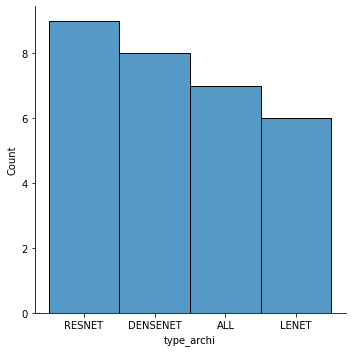

In [270]:
sns.displot(test5, x="type_archi")

In [271]:
test5_soa = pd.concat([test5, data_soa])

<function matplotlib.pyplot.show(close=None, block=None)>

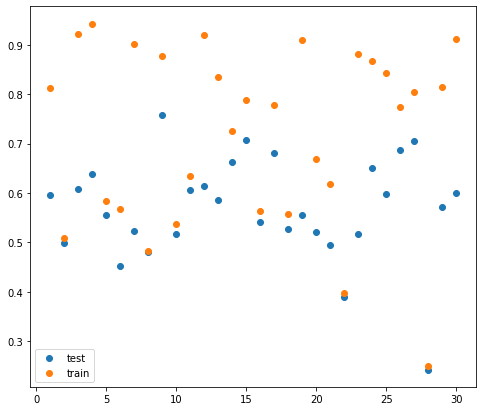

In [272]:
plt.scatter(range(1,len(test5)+1), test5['test_result_acc'], label="test")
plt.scatter(range(1,len(test5)+1), test5['train_result_acc'], label="train")

plt.legend()
plt.show

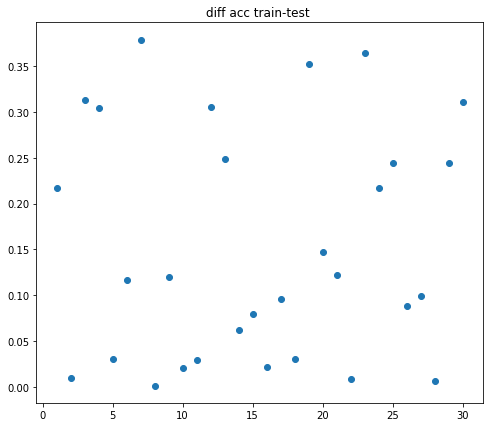

In [273]:
plt.scatter(range(1,len(test5)+1), test5['train_result_acc']-test5['test_result_acc'])

plt.title("diff acc train-test ")
plt.show()

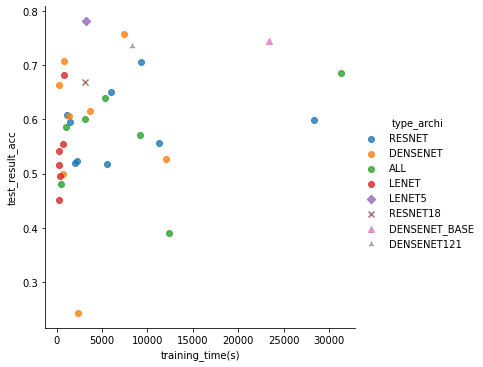

In [274]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test5_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o" ,"o" ,"D", "x", "^", "2"]
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

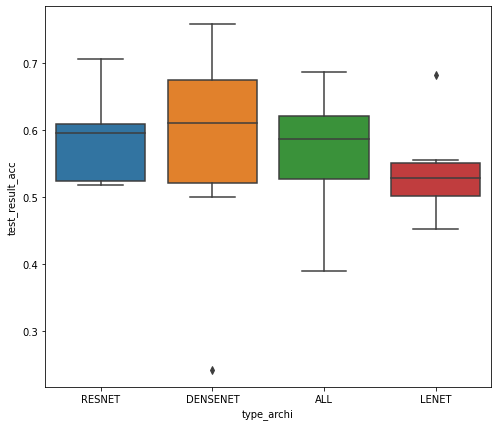

In [275]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test5)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

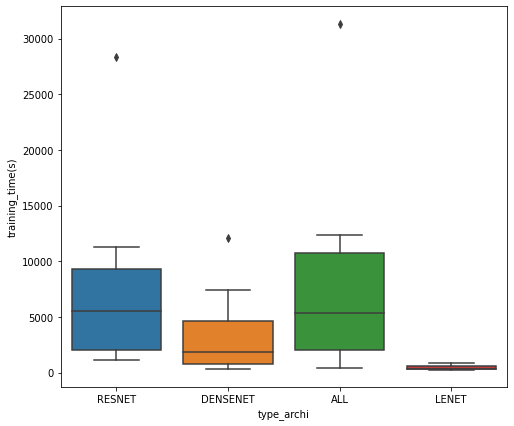

In [276]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test5)

<AxesSubplot:xlabel='type_archi', ylabel='epochs'>

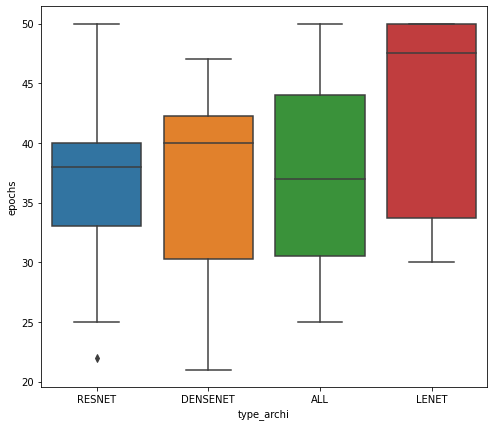

In [277]:
sns.boxplot(y='epochs', x='type_archi', data=test5)

# Experiment 6 : Diversitas
- batch 1024

In [278]:
test6 = data[130:230]

In [279]:
test6["Diff"] = test6['train_result_acc']-test6['test_result_acc']

<ipython-input-279-dbf55ebdacfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test6["Diff"] = test6['train_result_acc']-test6['test_result_acc']


In [280]:
test6

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi,Diff
130,archi_v3_1,6271.910210,1.502455,0.6216,0.76642,0.766478,45,36,ALL,0.14482
131,archi_v3_2,1189.706330,3.319851,0.1265,0.12824,3.307527,41,15,ALL,0.00174
132,archi_v3_3,11977.805895,2.146404,0.6441,0.89390,0.646369,62,45,ALL,0.24980
133,archi_v3_4,456.898571,1.487739,0.5458,0.70144,0.916313,17,29,ALL,0.15564
134,archi_v3_5,3625.997219,1.512231,0.4318,0.43906,1.478427,68,33,ALL,0.00726
...,...,...,...,...,...,...,...,...,...,...
225,archi_v3_96,444.906419,1.200992,0.5827,0.67232,0.957547,6,50,DENSENET,0.08962
226,archi_v3_97,2624.874774,2.784048,0.1620,0.16260,2.788476,54,14,DENSENET,0.00060
227,archi_v3_98,3192.642611,1.566883,0.5211,0.71690,0.885460,23,50,DENSENET,0.19580
228,archi_v3_99,2824.635496,2.084113,0.2189,0.21258,2.092377,37,12,DENSENET,-0.00632


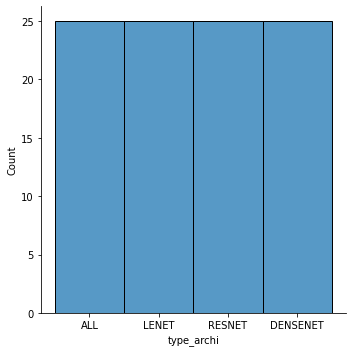

In [281]:
sns.displot(test6, x="type_archi")

In [282]:
test6_soa = pd.concat([test6, data_soa_diversitas])

<function matplotlib.pyplot.show(close=None, block=None)>

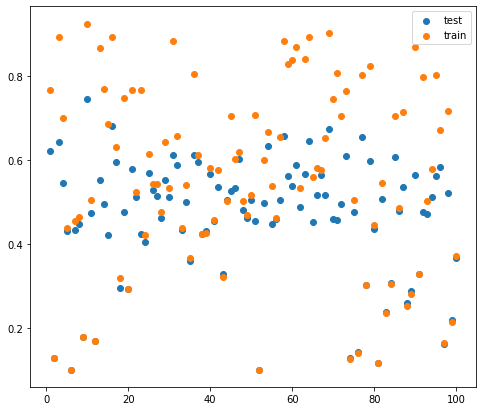

In [283]:
plt.scatter(range(1,len(test6)+1), test6['test_result_acc'], label="test")
plt.scatter(range(1,len(test6)+1), test6['train_result_acc'], label="train")

plt.legend()
plt.show

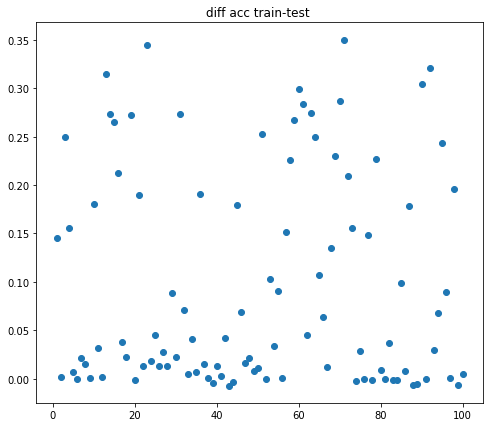

In [284]:
plt.scatter(range(1,len(test6)+1), test6['Diff'])

plt.title("diff acc train-test ")
plt.show()

Text(0.5, 1.0, 'test')

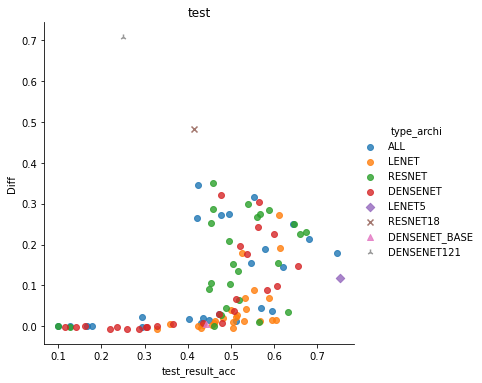

In [285]:
sns.lmplot(
    x='test_result_acc',
    y='Diff',
    data=test6_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2"]
)
plt.title("test")

Text(0.5, 1.0, 'Train')

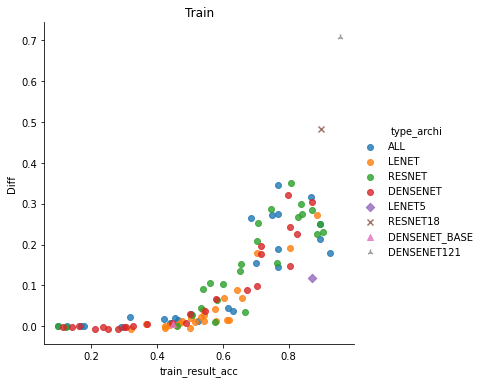

In [286]:
sns.lmplot(
    x='train_result_acc',
    y='Diff',
    data=test6_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2"]
)
plt.title("Train")

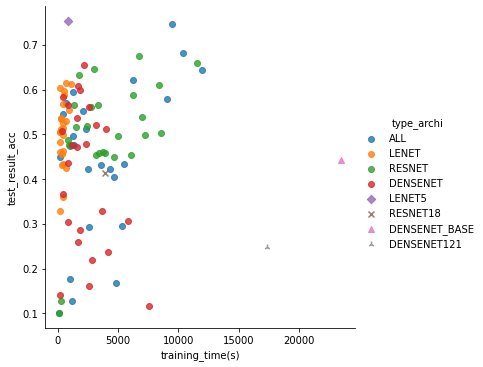

In [287]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test6_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2"]
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

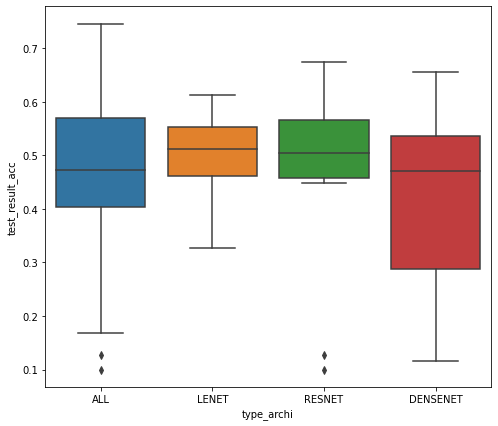

In [288]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test6)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

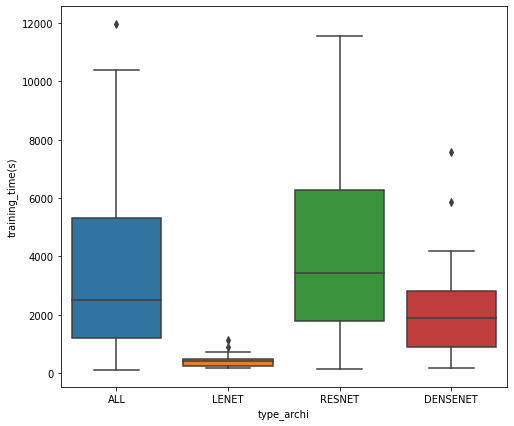

In [289]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test6)

<AxesSubplot:xlabel='type_archi', ylabel='epochs'>

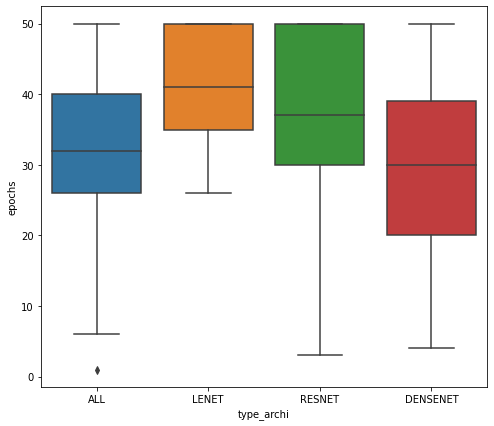

In [290]:
sns.boxplot(y='epochs', x='type_archi', data=test6)

# Experiment 7 : Diversitas
- batch 64

In [291]:
test7 = data[230:430]

In [292]:
test7["Diff"] = test7['train_result_acc']-test7['test_result_acc']

<ipython-input-292-5da0d084046d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7["Diff"] = test7['train_result_acc']-test7['test_result_acc']


In [293]:
test7['label_diff'] = test7.apply(lambda row: create_label(row), axis = 1)

<ipython-input-293-cf345d4b07ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test7['label_diff'] = test7.apply(lambda row: create_label(row), axis = 1)


In [294]:
test7

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs,type_archi,Diff,label_diff
230,archi_v3_1,597.726054,1.527453,0.6291,0.74900,0.881752,45,37,ALL,0.11990,> 0.10
231,archi_v3_2,319.425797,2.976629,0.1681,0.16242,2.984003,41,34,ALL,-0.00568,< 0.05
232,archi_v3_3,608.903776,1.572053,0.6984,0.88660,0.536141,62,18,ALL,0.18820,> 0.15
233,archi_v3_4,254.716149,2.542683,0.5321,0.81194,0.898634,17,35,ALL,0.27984,> 0.25
234,archi_v3_5,388.494899,1.362873,0.4996,0.50968,1.329198,68,30,ALL,0.01008,< 0.05
...,...,...,...,...,...,...,...,...,...,...,...
425,archi_v3_196,768.147602,1.956192,0.6504,0.75884,1.069472,79,43,DENSENET,0.10844,> 0.10
426,archi_v3_197,290.178942,1.202554,0.5774,0.60370,1.122089,52,26,DENSENET,0.02630,< 0.05
427,archi_v3_198,250.124930,2.343708,0.6046,0.80478,0.934348,31,32,DENSENET,0.20018,> 0.20
428,archi_v3_199,129.796905,1.647543,0.3984,0.40794,1.633172,5,42,DENSENET,0.00954,< 0.05


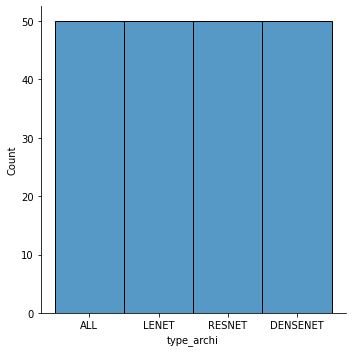

In [295]:
sns.displot(test7, x="type_archi")

In [296]:
test7_soa = pd.concat([test7, data_soa_diversitas_64])

<function matplotlib.pyplot.show(close=None, block=None)>

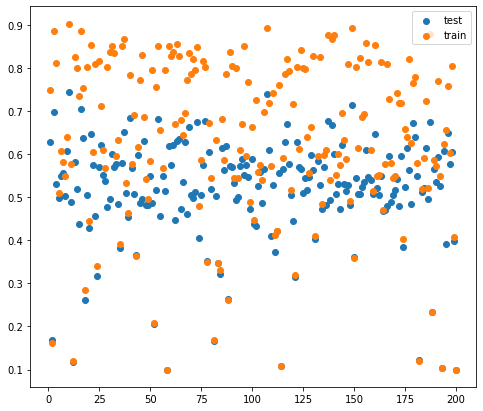

In [297]:
plt.scatter(range(1,len(test7)+1), test7['test_result_acc'], label="test")
plt.scatter(range(1,len(test7)+1), test7['train_result_acc'], label="train")

plt.legend()
plt.show

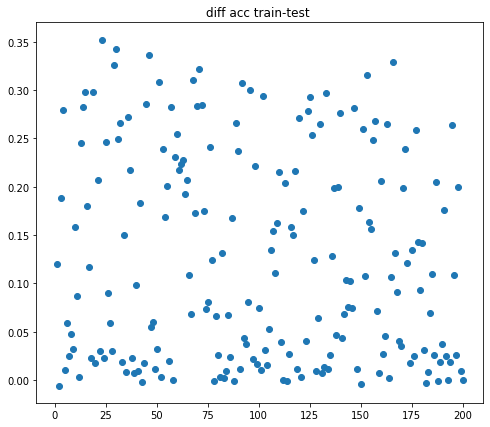

In [298]:
plt.scatter(range(1,len(test7)+1), test7['Diff'])

plt.title("diff acc train-test ")
plt.show()

Text(0.5, 1.0, 'test')

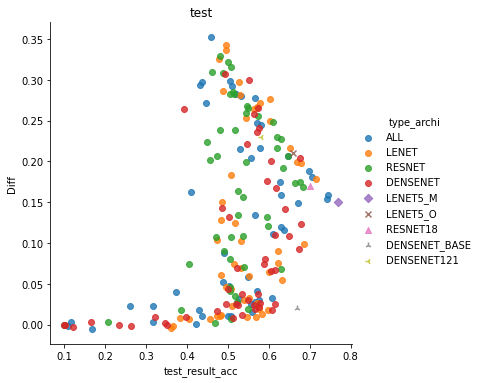

In [299]:
sns.lmplot(
    x='test_result_acc',
    y='Diff',
    data=test7_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2", "3"]
)
plt.title("test")

Text(0.5, 1.0, 'Train')

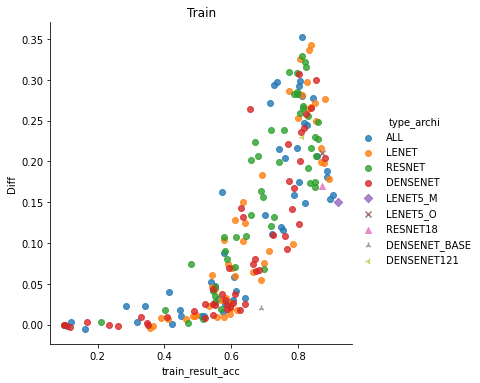

In [300]:
sns.lmplot(
    x='train_result_acc',
    y='Diff',
    data=test7_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2", "3"]
)
plt.title("Train")

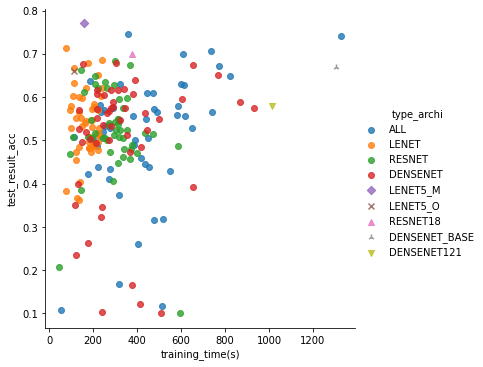

In [301]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test7_soa,
    hue='type_archi',
    fit_reg=False,
    markers=["o", "o","o","o", "D", "x", "^", "2", "v"]
)

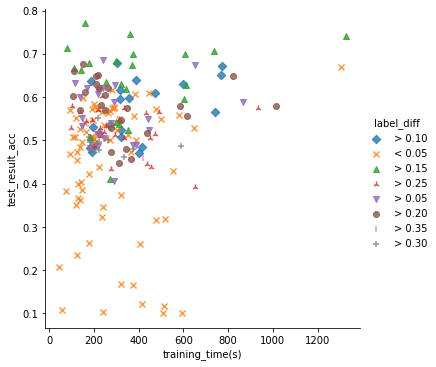

In [302]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test7_soa,
    hue='label_diff',
    fit_reg=False,
    markers=["D", "x", "^", "2", "v", "o", "|", "+"]
)

<AxesSubplot:xlabel='type_archi', ylabel='test_result_acc'>

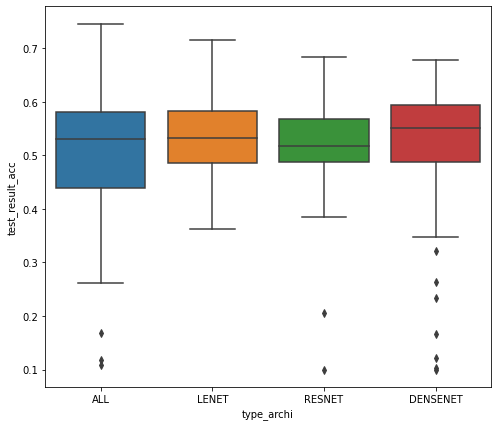

In [303]:
sns.boxplot(y='test_result_acc', x='type_archi' ,data=test7)

<AxesSubplot:xlabel='type_archi', ylabel='train_result_acc'>

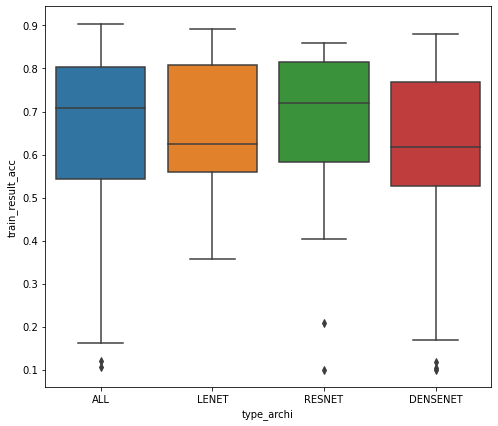

In [304]:
sns.boxplot(y='train_result_acc', x='type_archi' ,data=test7)

<AxesSubplot:xlabel='type_archi', ylabel='training_time(s)'>

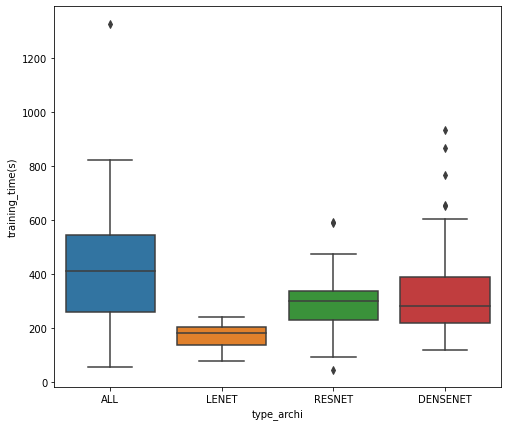

In [305]:
sns.boxplot(y='training_time(s)', x='type_archi', data=test7)

<AxesSubplot:xlabel='type_archi', ylabel='epochs'>

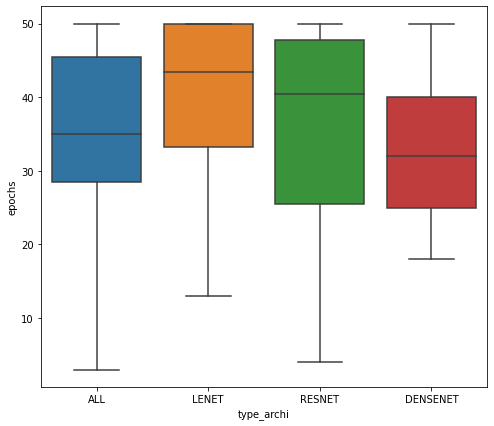

In [306]:
sns.boxplot(y='epochs', x='type_archi', data=test7)

# Normal distribution + CI for ALL Architectures

In [307]:
mu_test = mean(test7['test_result_acc'])
sigma_test = stdev(test7['test_result_acc'])

mu_train = mean(test7['train_result_acc'])
sigma_train = stdev(test7['train_result_acc'])

(0.279540162100258, 0.755053835646448)
(0.2781840095134506, 1.0072837928472032)


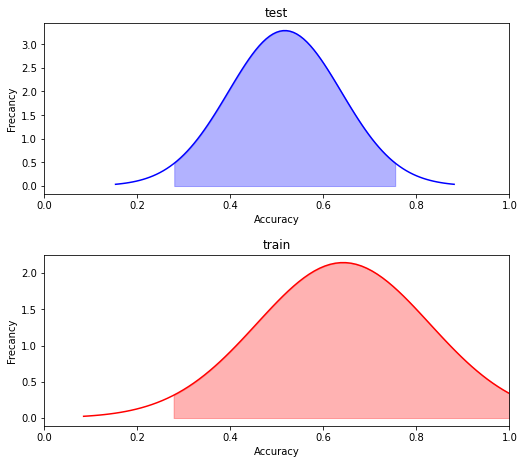

In [308]:
fig, (axs0, axs1) = plt.subplots(2)

fig.tight_layout(pad=4.0)

x_test = np.linspace(mu_test - 3*sigma_test, mu_test + 3*sigma_test, 100)
x_train = np.linspace(mu_train - 3*sigma_train, mu_train + 3*sigma_train, 100)

# plot courbe

axs0.plot(x_test, stats.norm.pdf(x_test, mu_test, sigma_test), color="blue")
axs1.plot(x_train, stats.norm.pdf(x_train, mu_train, sigma_train), color ="red")


ci = scipy.stats.norm.interval(0.95, loc=mu_test, scale=sigma_test)
ci_2 = scipy.stats.norm.interval(0.95, loc=mu_train, scale=sigma_train)
print(ci)
print(ci_2)

x_fill_test = np.arange(ci[0], ci[1], 0.001)
y_fill_test = stats.norm.pdf(x_fill_test, mu_test, sigma_test)

x_fill_train = np.arange(ci_2[0], ci_2[1], 0.001)
y_fill_train = stats.norm.pdf(x_fill_train, mu_train, sigma_train)


# plot fill
axs0.fill_between(x_fill_test,y_fill_test,0, alpha=0.3, color='b')
axs1.fill_between(x_fill_train,y_fill_train,0, alpha=0.3, color='r')


# axis names 
axs0.set_xlabel("Accuracy")
axs0.set_ylabel("Frecancy")

axs1.set_xlabel("Accuracy")
axs1.set_ylabel("Frecancy")

# title 
axs0.set_title("test")
axs1.set_title("train")

#scale
axs0.set_xlim([0,1])
axs1.set_xlim([0,1])


plt.show()

# Normal distribution + CI for type archi : ALL

In [309]:
architecture_all = test7.loc[test7['type_archi'] == "ALL"]

In [310]:
mu_test = mean(architecture_all['test_result_acc'])
sigma_test = stdev(architecture_all['test_result_acc'])

mu_train = mean(architecture_all['train_result_acc'])
sigma_train = stdev(architecture_all['train_result_acc'])

(0.23229833028145586, 0.7874296677964137)
(0.23263483707405874, 1.0419611647298161)


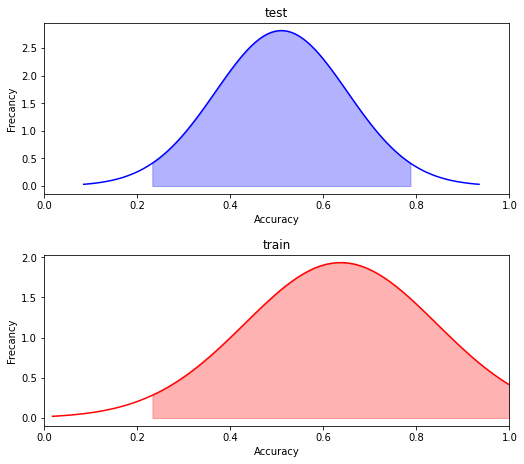

In [311]:
fig, (axs0, axs1) = plt.subplots(2)

fig.tight_layout(pad=4.0)

x_test = np.linspace(mu_test - 3*sigma_test, mu_test + 3*sigma_test, 100)
x_train = np.linspace(mu_train - 3*sigma_train, mu_train + 3*sigma_train, 100)

# plot courbe

axs0.plot(x_test, stats.norm.pdf(x_test, mu_test, sigma_test), color="blue")
axs1.plot(x_train, stats.norm.pdf(x_train, mu_train, sigma_train), color ="red")


ci = scipy.stats.norm.interval(0.95, loc=mu_test, scale=sigma_test)
ci_2 = scipy.stats.norm.interval(0.95, loc=mu_train, scale=sigma_train)
print(ci)
print(ci_2)

x_fill_test = np.arange(ci[0], ci[1], 0.001)
y_fill_test = stats.norm.pdf(x_fill_test, mu_test, sigma_test)

x_fill_train = np.arange(ci_2[0], ci_2[1], 0.001)
y_fill_train = stats.norm.pdf(x_fill_train, mu_train, sigma_train)


# plot fill
axs0.fill_between(x_fill_test,y_fill_test,0, alpha=0.3, color='b')
axs1.fill_between(x_fill_train,y_fill_train,0, alpha=0.3, color='r')


# axis names 
axs0.set_xlabel("Accuracy")
axs0.set_ylabel("Frecancy")

axs1.set_xlabel("Accuracy")
axs1.set_ylabel("Frecancy")

# title 
axs0.set_title("test")
axs1.set_title("train")

#scale
axs0.set_xlim([0,1])
axs1.set_xlim([0,1])



plt.show()

# Normal distribution + CI for type archi : LENET

In [312]:
architecture_lenet = test7.loc[test7['type_archi'] == "LENET"]

In [313]:
mu_test = mean(architecture_lenet['test_result_acc'])
sigma_test = stdev(architecture_lenet['test_result_acc'])

mu_train = mean(architecture_lenet['train_result_acc'])
sigma_train = stdev(architecture_lenet['train_result_acc'])

(0.3847500167047894, 0.6907459785783374)
(0.3623311912480967, 0.9533864081438406)


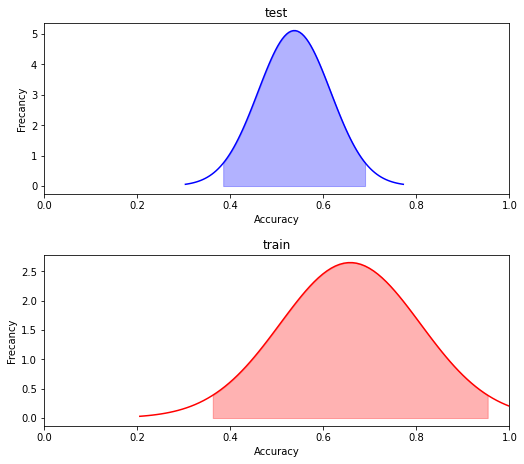

In [314]:
fig, (axs0, axs1) = plt.subplots(2)

fig.tight_layout(pad=4.0)

x_test = np.linspace(mu_test - 3*sigma_test, mu_test + 3*sigma_test, 100)
x_train = np.linspace(mu_train - 3*sigma_train, mu_train + 3*sigma_train, 100)

# plot courbe

axs0.plot(x_test, stats.norm.pdf(x_test, mu_test, sigma_test), color="blue")
axs1.plot(x_train, stats.norm.pdf(x_train, mu_train, sigma_train), color ="red")


ci = scipy.stats.norm.interval(0.95, loc=mu_test, scale=sigma_test)
ci_2 = scipy.stats.norm.interval(0.95, loc=mu_train, scale=sigma_train)
print(ci)
print(ci_2)

x_fill_test = np.arange(ci[0], ci[1], 0.001)
y_fill_test = stats.norm.pdf(x_fill_test, mu_test, sigma_test)

x_fill_train = np.arange(ci_2[0], ci_2[1], 0.001)
y_fill_train = stats.norm.pdf(x_fill_train, mu_train, sigma_train)


# plot fill
axs0.fill_between(x_fill_test,y_fill_test,0, alpha=0.3, color='b')
axs1.fill_between(x_fill_train,y_fill_train,0, alpha=0.3, color='r')


# axis names 
axs0.set_xlabel("Accuracy")
axs0.set_ylabel("Frecancy")

axs1.set_xlabel("Accuracy")
axs1.set_ylabel("Frecancy")

# title 
axs0.set_title("test")
axs1.set_title("train")

#scale
axs0.set_xlim([0,1])
axs1.set_xlim([0,1])



plt.show()

# Normal distribution + CI for type archi : RESNET

In [315]:
architecture_resnet = test7.loc[test7['type_archi'] == "RESNET"]

In [316]:
mu_test = mean(architecture_resnet['test_result_acc'])
sigma_test = stdev(architecture_resnet['test_result_acc'])

mu_train = mean(architecture_resnet['train_result_acc'])
sigma_train = stdev(architecture_resnet['train_result_acc'])

(0.3213307618928037, 0.7194172349738994)
(0.3629073764544374, 1.0076286287445182)


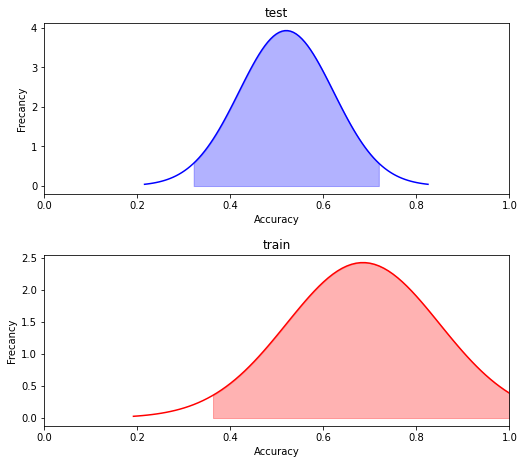

In [317]:
fig, (axs0, axs1) = plt.subplots(2)

fig.tight_layout(pad=4.0)

x_test = np.linspace(mu_test - 3*sigma_test, mu_test + 3*sigma_test, 100)
x_train = np.linspace(mu_train - 3*sigma_train, mu_train + 3*sigma_train, 100)

# plot courbe

axs0.plot(x_test, stats.norm.pdf(x_test, mu_test, sigma_test), color="blue")
axs1.plot(x_train, stats.norm.pdf(x_train, mu_train, sigma_train), color ="red")


ci = scipy.stats.norm.interval(0.95, loc=mu_test, scale=sigma_test)
ci_2 = scipy.stats.norm.interval(0.95, loc=mu_train, scale=sigma_train)
print(ci)
print(ci_2)

x_fill_test = np.arange(ci[0], ci[1], 0.001)
y_fill_test = stats.norm.pdf(x_fill_test, mu_test, sigma_test)

x_fill_train = np.arange(ci_2[0], ci_2[1], 0.001)
y_fill_train = stats.norm.pdf(x_fill_train, mu_train, sigma_train)


# plot fill
axs0.fill_between(x_fill_test,y_fill_test,0, alpha=0.3, color='b')
axs1.fill_between(x_fill_train,y_fill_train,0, alpha=0.3, color='r')


# axis names 
axs0.set_xlabel("Accuracy")
axs0.set_ylabel("Frecancy")

axs1.set_xlabel("Accuracy")
axs1.set_ylabel("Frecancy")

# title 
axs0.set_title("test")
axs1.set_title("train")

#scale
axs0.set_xlim([0,1])
axs1.set_xlim([0,1])


plt.show()

# Normal distribution + CI for type archi : DENSENET

In [318]:
architecture_densenet = test7.loc[test7['type_archi'] == "DENSENET"]

In [319]:
mu_test = mean(architecture_densenet['test_result_acc'])
sigma_test = stdev(architecture_densenet['test_result_acc'])

mu_train = mean(architecture_densenet['train_result_acc'])
sigma_train = stdev(architecture_densenet['train_result_acc'])

(0.2069294958265377, 0.7954745049325871)
(0.1831740623510283, 0.9978475406968195)


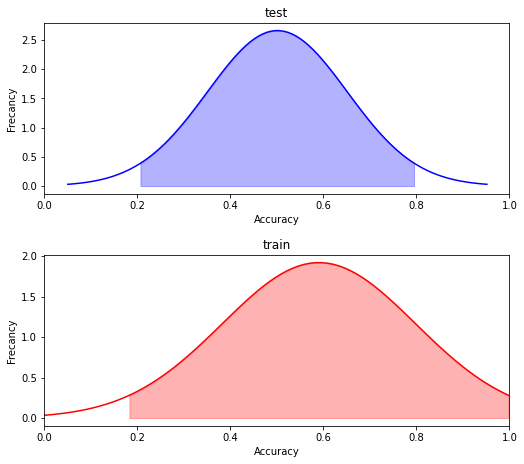

In [320]:
fig, (axs0, axs1) = plt.subplots(2)

fig.tight_layout(pad=4.0)

x_test = np.linspace(mu_test - 3*sigma_test, mu_test + 3*sigma_test, 100)
x_train = np.linspace(mu_train - 3*sigma_train, mu_train + 3*sigma_train, 100)

# plot courbe

axs0.plot(x_test, stats.norm.pdf(x_test, mu_test, sigma_test), color="blue")
axs1.plot(x_train, stats.norm.pdf(x_train, mu_train, sigma_train), color ="red")


ci = scipy.stats.norm.interval(0.95, loc=mu_test, scale=sigma_test)
ci_2 = scipy.stats.norm.interval(0.95, loc=mu_train, scale=sigma_train)
print(ci)
print(ci_2)

x_fill_test = np.arange(ci[0], ci[1], 0.001)
y_fill_test = stats.norm.pdf(x_fill_test, mu_test, sigma_test)

x_fill_train = np.arange(ci_2[0], ci_2[1], 0.001)
y_fill_train = stats.norm.pdf(x_fill_train, mu_train, sigma_train)


# plot fill
axs0.fill_between(x_fill_test,y_fill_test,0, alpha=0.3, color='b')
axs1.fill_between(x_fill_train,y_fill_train,0, alpha=0.3, color='r')


# axis names 
axs0.set_xlabel("Accuracy")
axs0.set_ylabel("Frecancy")

axs1.set_xlabel("Accuracy")
axs1.set_ylabel("Frecancy")

# title 
axs0.set_title("test")
axs1.set_title("train")

#scale
axs0.set_xlim([0,1])
axs1.set_xlim([0,1])


plt.show()